# Battery Worksheet
## Intro

Lithium-ion batteries power many of today's technologies such as phones, laptops, and electric vehicles. Ensuring that lithium-ion batteries remain cool is critical to ensuring that they remain safe. If the temperature of a lithium-ion battery exceeds 60C, then the battery can start to degrade leading to the release of flammable gases.

The temperature of a lithium-ion battery is roughly determined by a balance between the heat that is generated by Joule heating and the heat that is lost into the surrounding environment. The battery temperature can be approximated by the equation

T = Tair + I^2*R/h

### Maximum current

In [4]:
import scipy as sp
import numpy as np

# Calculate the current I at which the battery temperature is 60C

# T = T_air + ((I**2)*R)/h

T = 60 # C
T_air = 23 # C
R = 3e-4 # ohm
h = 1.86e-4 # W/C

fun = lambda I: T - T_air - ((I**2)*R)/h 

I = sp.optimize.root(fun, 0.5).x[0]
print(I)


4.789572005931219


## Alternating current

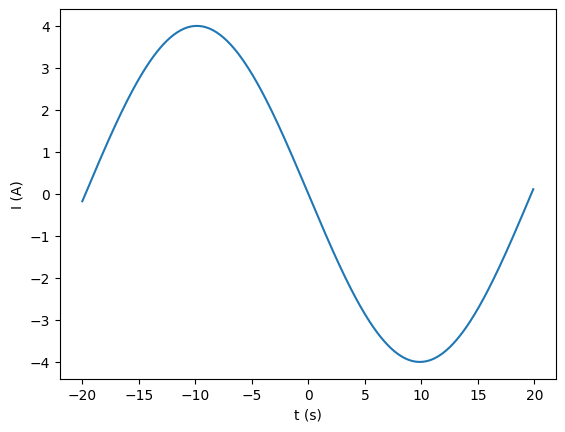

In [6]:
# I(t) = I0*sin(omega*t)
I_0 = 4 # A
omega = 314 # rad/s

# plot I(t) for t = 0 to 20s in steps of 0.1s

import matplotlib.pyplot as plt
x = np.arange(-20, 20, 0.1)
y = I_0*np.sin(omega*x)

plt.plot(x, y)
plt.xlabel('t (s)')
plt.ylabel('I (A)')
plt.show()

### Extension, The electric resistance is often a function of temperature. Plot the battery temperature as a function of time when an alternating current is applied to it. Compare your results to the case when the resistance R is constant Investigate what happens as α is increased. Write some text that explains your results.


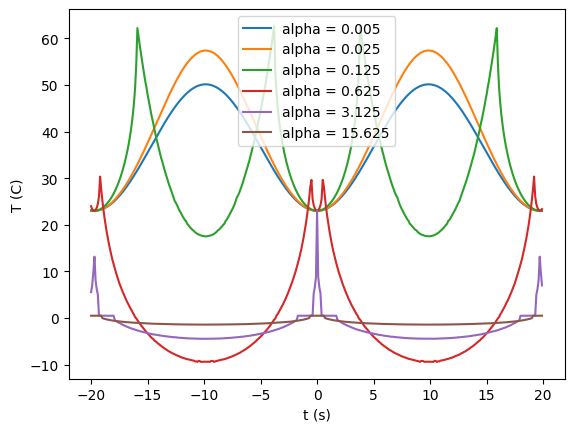

In [16]:
R0 = 3e-4 # ohm
alpha = 0.001 # 1/C
# R = R0 * exp(alpha*Temp)
h = 1.86e-4 # W/C
T_air = 23 # C

# for a sinusoidally varying current I(t) = I0*sin(omega*t) calculate temperature at each time and plot against time

I_0 = 4 # A
omega = 314 # rad/s

t = np.arange(-20, 20, 0.1)
I = I_0*np.sin(omega*t)
T = np.zeros(len(t))

# plot for alpha = 0.01, 0.1, 1
for i in range(6):
    for i in range(len(I)):
        newFun = lambda T : T - T_air - (I[i]**2 * R0 * np.exp(alpha*T))/h
        T[i] = sp.optimize.root(newFun, 0.5).x[0]
    alpha = alpha*5
    
    plt.plot(t, T, label = 'alpha = ' + str(alpha))

plt.legend()
plt.xlabel('t (s)') 
plt.ylabel('T (C)')
plt.show()